In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generowanie zbioru danych

## Korzeń

In [2]:
n = 250 #liczba punktów
center = (0.5, 0.1) # punkt środkowy
width = 0.2 # szerokość
height = 0.2 # wysokość
area = 70 # pole przeciętnego punktu

points_root = []

while len(points_root) != n:
    point = np.random.uniform(0, 1, 2)
    if (abs(point[0]-center[0]) < width / 2) and (abs(point[1]-center[1]) < height / 2):
        points_root.append(list(point) + [abs(area + np.random.randn() * 20)])

points_root = pd.DataFrame(points_root, columns = ['x', 'y', 's'])
points_root

,x,y,s
0,0.428090,0.197529,40.293107
1,0.507558,0.028690,75.305056
2,0.481524,0.092364,73.968756
3,0.472189,0.102040,21.859065
4,0.575345,0.070139,47.637424
...,...,...,...
245,0.456775,0.140720,71.835324
246,0.572846,0.067097,92.290884
247,0.550499,0.189582,74.157745
248,0.593047,0.161946,112.776199


## Trójkąty

In [3]:
def in_triangle(p, x, y0, y1):
    "Funkcja sprawdzająca, czy punkt p leży wewnątrz trójkąta równob. o wierzchołku (x,y1) i środku przeciwległego boku (x,y0)"
        
    A, B, C = (x, y1), (x - (y1-y0)/3**0.5, y0), (x + (y1-y0)/3**0.5, y0)
    if (point[1] < y0) or (point[0] == B[0]) or (point[0] == C[0]):
        return False
    
    coeffs = (point[1] - B[1]) / (point[0] - B[0]), (point[1] - C[1]) / (point[0] - C[0])
    
    return (coeffs[0] > 0) and (coeffs[0] < 3**0.5) and (coeffs[1] < 0) and (coeffs[1] > -3**0.5)

In [4]:
n = 2000

points_triangles = []

while len(points_triangles) != n:
    point = np.random.uniform(0, 1, 2)
    if in_triangle(point, 0.5, 0.2, 0.8) or in_triangle(point, 0.5, 0.6, 1):
        points_triangles.append(list(point) + [abs(area + np.random.randn() * 20)])

points_triangles = pd.DataFrame(points_triangles, columns = ['x', 'y', 's'])
points_triangles

,x,y,s
0,0.404662,0.458775,56.179512
1,0.672349,0.382738,78.352205
2,0.434454,0.385774,51.105045
3,0.677861,0.273608,75.526209
4,0.535423,0.303390,84.283526
...,...,...,...
1995,0.357875,0.287702,62.935663
1996,0.534202,0.730515,59.097507
1997,0.432981,0.511359,72.823162
1998,0.815688,0.220347,81.960076


# Choinka

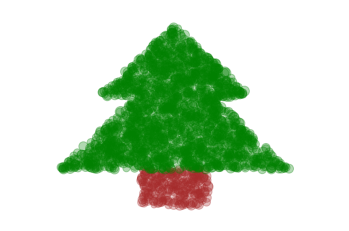

In [10]:
alpha = 0.3

plt.xlim(0, 1)
plt.ylim(-0.1, 1.1)
plt.scatter(points_root['x'], points_root['y'], c = 'brown', s = points_root['s'], alpha = alpha)
plt.scatter(points_triangles['x'], points_triangles['y'], c = 'green', s = points_triangles['s'], alpha = alpha)
plt.axis('off')
plt.show()